In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
#Connect to drive to access datasets
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Preprocessing

In [ ]:
#Load data
data = pd.read_csv('/content/drive/MyDrive/AAI511/MODULE6/creditcard.csv/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#See data distribution
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#Create even distribution of both types of transactions
true = data[data.Class == 0]
fraud = data[data.Class == 1]
true_sample = true.sample(n=492)
df = pd.concat([true_sample , fraud], axis = 0)
df["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
#Normalize data and split into train, test, and validation sets
x = df.drop(columns=['Class'])
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
print(x_train.shape, x_val.shape, x_test.shape)

(708, 30) (177, 30) (99, 30)


In [ ]:
#Seperate the normal from the abnormal transactions
y_train = y_train.astype(bool)
y_val = y_val.astype(bool)
y_test = y_test.astype(bool)

x_train_true = x_train[~y_train]
x_val_true = x_val[~y_val]
x_test_true = x_test[~y_test]

x_train_fraud = x_train[y_train]
x_val_fraud = x_val[y_val]
x_test_fraud = x_test[y_test]

#Train Model

In [ ]:
#Build the Deep encoder model
#1 layer
# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(100, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

#2 layers
# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(100, activation="relu"),
#       layers.Dense(50, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(15, activation="relu"),
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

#3 layers
# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(100, activation="relu"),
#       layers.Dense(50, activation="relu"),
#       layers.Dense(25, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(8, activation="relu"),
#       layers.Dense(15, activation="relu"),
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

#4 layers
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(100, activation="relu"),
      layers.Dense(50, activation="relu"),
      layers.Dense(25, activation="relu"),
      layers.Dense(12, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(4, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(15, activation="relu"),
      layers.Dense(30, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

#5 layers
# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(100, activation="relu"),
#       layers.Dense(50, activation="relu"),
#       layers.Dense(25, activation="relu"),
#       layers.Dense(12, activation="relu"),
#       layers.Dense(6, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(2, activation="relu"),
#       layers.Dense(4, activation="relu"),
#       layers.Dense(8, activation="relu"),
#       layers.Dense(15, activation="relu"),
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

autoencoder = AnomalyDetector()

#Compile and build the model
autoencoder.compile(optimizer='adam',
                    loss='mae',
                    metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = autoencoder.fit(x_train_true, x_train_true,
          epochs=50,
          batch_size=512,
          validation_data=(x_val, x_val),
          shuffle=True,verbose=0)

#Calculate the reconstruction loss and evaluation metrics
reconstructions = autoencoder.predict(x_train_true)
train_loss = tf.keras.losses.mae(reconstructions, x_train_true)
threshold = np.mean(train_loss) + np.std(train_loss)

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder, x_val, threshold)
print_stats(preds, y_val)

11/11 [==============================] - 0s 2ms/step
Accuracy = 0.3446327683615819
Precision = 0.3722627737226277
Recall = 0.6296296296296297


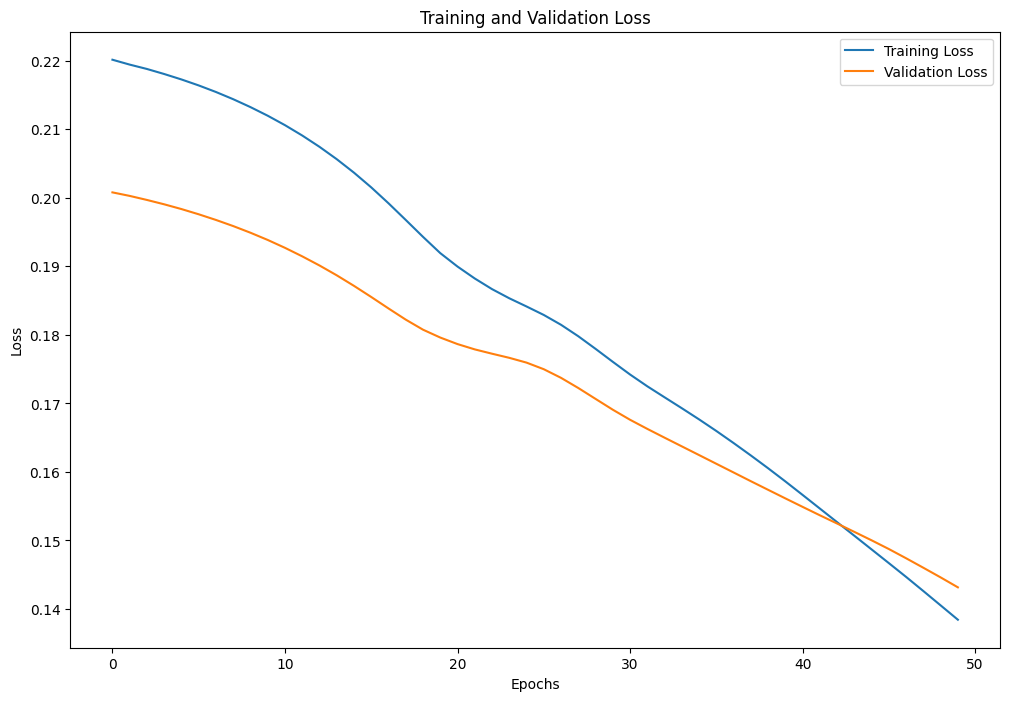

In [ ]:
#Training and validation loss visuals
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

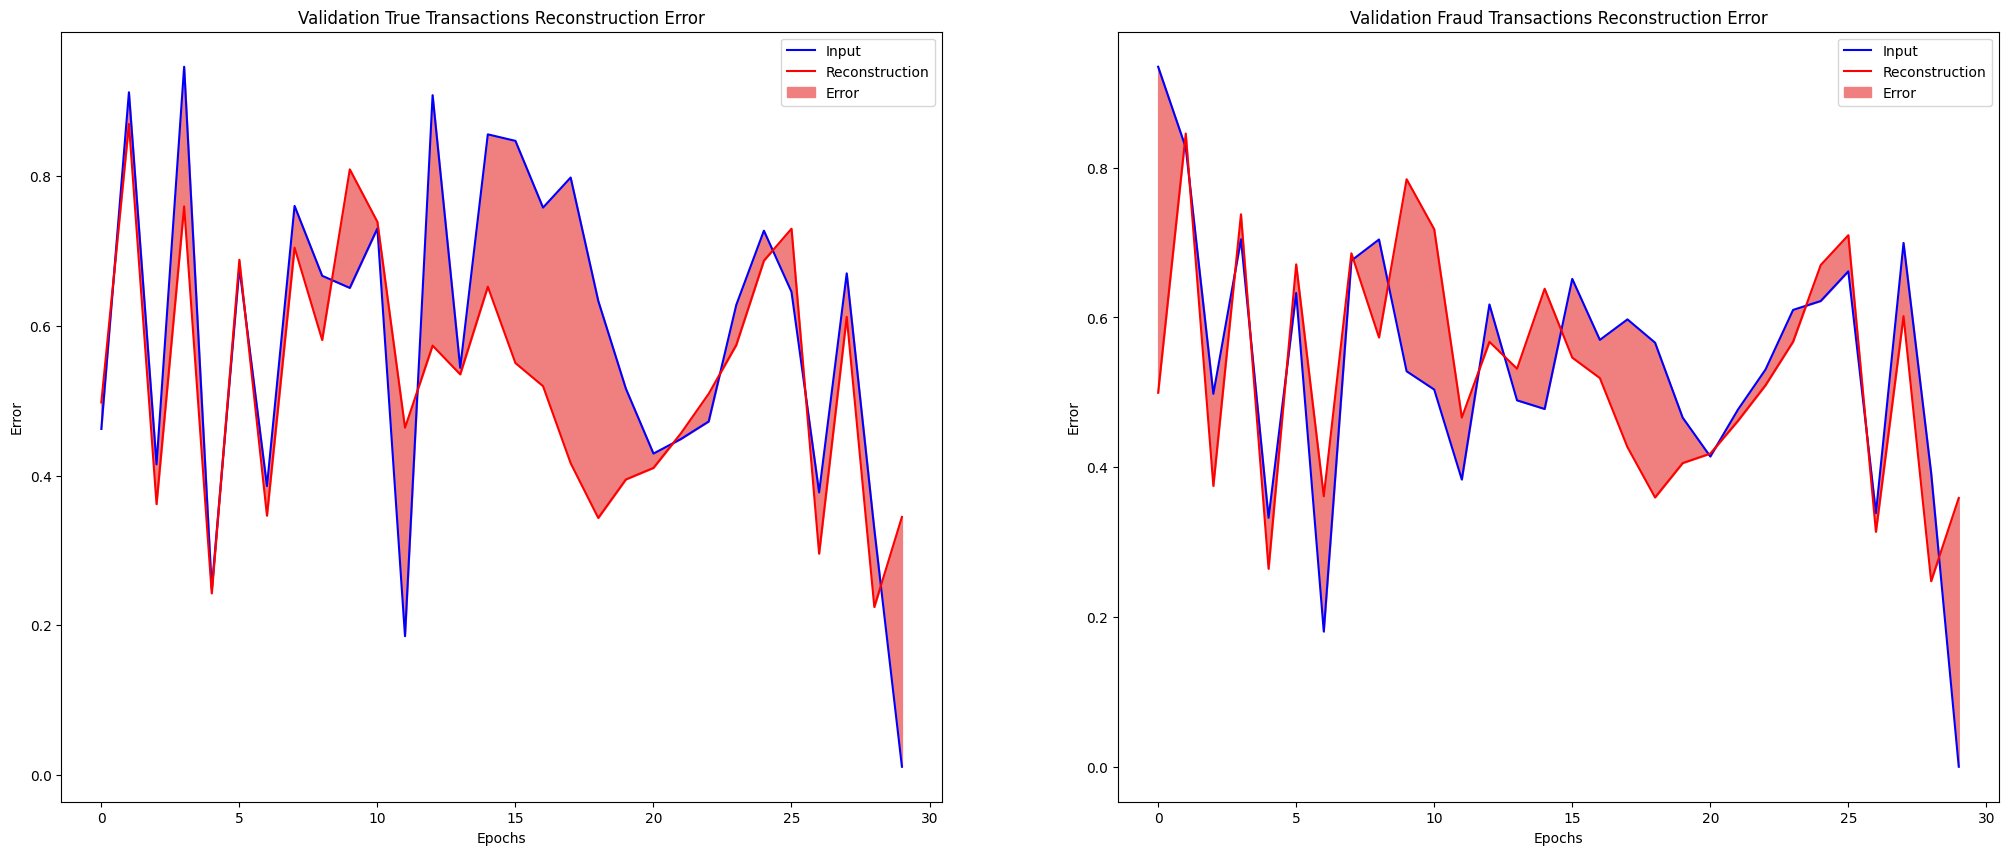

In [ ]:
#Visualize validation data recontruction error
encoded_data = autoencoder.encoder(x_val_true).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
ax1.plot(x_val_true[0], 'b')
ax1.plot(decoded_data[0], 'r')
ax1.fill_between(np.arange(30), decoded_data[0], x_val_true[0], color='lightcoral')
ax1.legend(labels=["Input", "Reconstruction", "Error"])
ax1.set_title('Validation True Transactions Reconstruction Error')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Error')

encoded_data = autoencoder.encoder(x_val_fraud).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

ax2.plot(x_val_fraud[0], 'b')
ax2.plot(decoded_data[0], 'r')
ax2.fill_between(np.arange(30), decoded_data[0], x_val_fraud[0], color='lightcoral')
ax2.legend(labels=["Input", "Reconstruction", "Error"])
ax2.set_title('Validation Fraud Transactions Reconstruction Error')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Error')
plt.show()

3/3 [==============================] - 0s 4ms/step


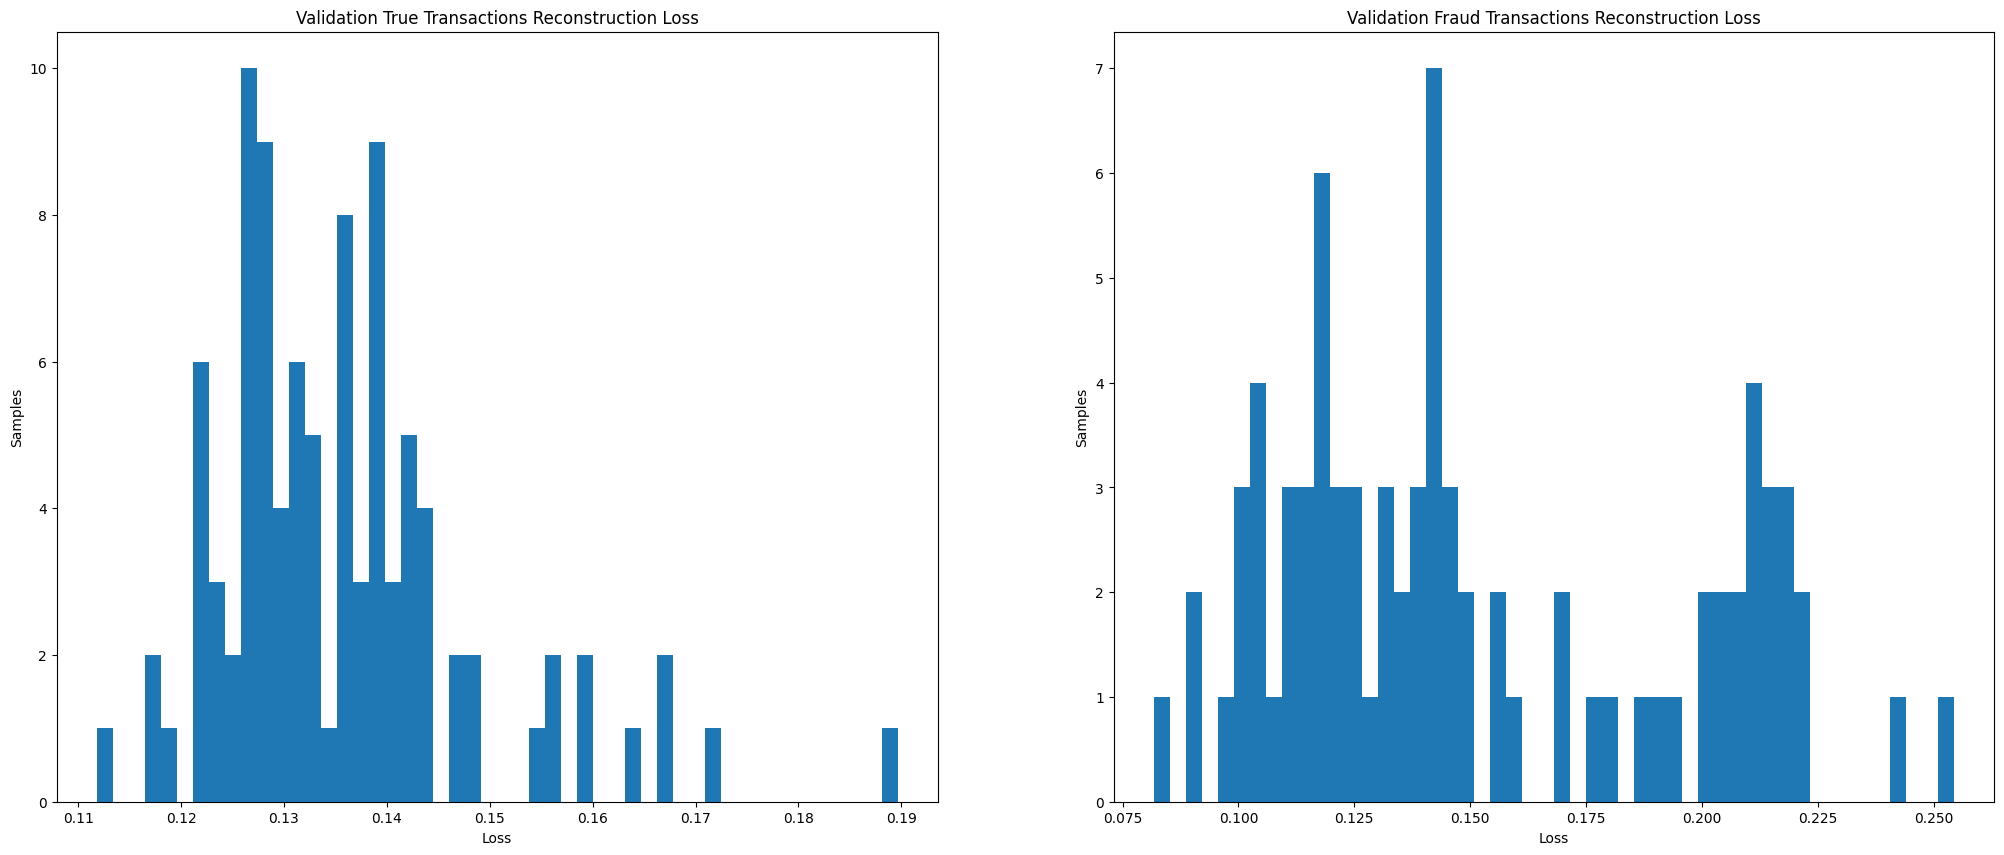

In [ ]:
#Visualize validation data recontruction loss
reconstructions = autoencoder.predict(x_val_true)
train_loss = tf.keras.losses.mae(reconstructions, x_val_true)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
ax1.hist(train_loss[None,:], bins=50)
ax1.set_title('Validation True Transactions Reconstruction Loss')
ax1.set_xlabel('Loss')
ax1.set_ylabel('Samples')

reconstructions = autoencoder.predict(x_val_fraud)
test_loss = tf.keras.losses.mae(reconstructions, x_val_fraud)

ax2.hist(test_loss[None, :], bins=50)
ax2.set_title('Validation Fraud Transactions Reconstruction Loss')
ax2.set_xlabel('Loss')
ax2.set_ylabel('Samples')
plt.show()

In [ ]:
#Build the Deep encoder model with exploration of encoding dimensions

# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(25, activation="relu"),
#       layers.Dense(12, activation="relu"),
#       layers.Dense(6, activation="relu"),
#       layers.Dense(3, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(4, activation="relu"),
#       layers.Dense(8, activation="relu"),
#       layers.Dense(15, activation="relu"),
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(50, activation="relu"),
#       layers.Dense(25, activation="relu"),
#       layers.Dense(12, activation="relu"),
#       layers.Dense(6, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(4, activation="relu"),
#       layers.Dense(8, activation="relu"),
#       layers.Dense(15, activation="relu"),
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(100, activation="relu"),
#       layers.Dense(50, activation="relu"),
#       layers.Dense(25, activation="relu"),
#       layers.Dense(12, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(4, activation="relu"),
#       layers.Dense(8, activation="relu"),
#       layers.Dense(15, activation="relu"),
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(200, activation="relu"),
#       layers.Dense(100, activation="relu"),
#       layers.Dense(50, activation="relu"),
#       layers.Dense(25, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(4, activation="relu"),
#       layers.Dense(8, activation="relu"),
#       layers.Dense(15, activation="relu"),
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Dense(500, activation="relu"),
#       layers.Dense(250, activation="relu"),
#       layers.Dense(125, activation="relu"),
#       layers.Dense(60, activation="relu")])

#     self.decoder = tf.keras.Sequential([
#       layers.Dense(4, activation="relu"),
#       layers.Dense(8, activation="relu"),
#       layers.Dense(15, activation="relu"),
#       layers.Dense(30, activation="sigmoid")])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

autoencoder = AnomalyDetector()

#Compile and build the model
autoencoder.compile(optimizer='adam',
                    loss='mae',
                    metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

autoencoder.fit(x_train_true, x_train_true,
          epochs=50,
          batch_size=512,
          validation_data=(x_val, x_val),
          shuffle=True,verbose=0)

#Calculate the reconstruction loss and evaluation metrics
reconstructions = autoencoder.predict(x_train_true)
train_loss = tf.keras.losses.mae(reconstructions, x_train_true)
threshold = np.mean(train_loss) + np.std(train_loss)

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder, x_val, threshold)
print_stats(preds, y_val)

11/11 [==============================] - 0s 2ms/step
Accuracy = 0.2824858757062147
Precision = 0.3230769230769231
Recall = 0.5185185185185185


In [ ]:
#Build the Deep encoder model
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(100, activation="relu"),
      layers.Dense(50, activation="relu"),
      layers.Dense(25, activation="relu"),
      layers.Dense(12, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(4, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(15, activation="relu"),
      layers.Dense(30, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

#Compile and build the model
#learning rate = 0.1
# autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
#                     loss='mae',
#                     metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

#learning rate = 0.01
# autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#                     loss='mae',
#                     metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

#learning rate = 0.001
# autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#                     loss='mae',
#                     metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

#learning rate = 0.0001
# autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#                     loss='mae',
#                     metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

#learning rate = 0.00001
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                    loss='mae',
                    metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

autoencoder.fit(x_train_true, x_train_true,
          epochs=50,
          batch_size=512,
          validation_data=(x_val, x_val),
          shuffle=True,verbose=0)

#Calculate the reconstruction loss and evaluation metrics
reconstructions = autoencoder.predict(x_train_true)
train_loss = tf.keras.losses.mae(reconstructions, x_train_true)
threshold = np.mean(train_loss) + np.std(train_loss)

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder, x_val, threshold)
print_stats(preds, y_val)

11/11 [==============================] - 0s 2ms/step
Accuracy = 0.5084745762711864
Precision = 0.48148148148148145
Recall = 0.9629629629629629


#Final Model

In [ ]:
#Build final model and evaluate on test dataset
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(100, activation="relu"),
      layers.Dense(50, activation="relu"),
      layers.Dense(25, activation="relu"),
      layers.Dense(12, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(4, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(15, activation="relu"),
      layers.Dense(30, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

#Compile and build the model
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                    loss='mae',
                    metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = autoencoder.fit(x_train_true, x_train_true,
          epochs=50,
          batch_size=512,
          validation_data=(x_test, x_test),
          shuffle=True,verbose=0)

#Calculate the reconstruction loss and evaluation metrics
reconstructions = autoencoder.predict(x_train_true)
train_loss = tf.keras.losses.mae(reconstructions, x_train_true)
threshold = np.mean(train_loss) + np.std(train_loss)

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder, x_test, threshold)
print_stats(preds, y_test)

11/11 [==============================] - 0s 2ms/step
Accuracy = 0.5353535353535354
Precision = 0.53125
Recall = 0.9807692307692307
